Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


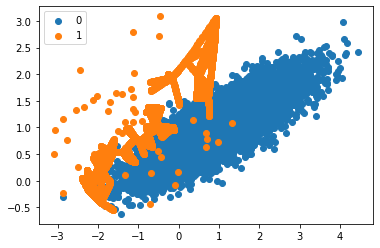

In [1]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


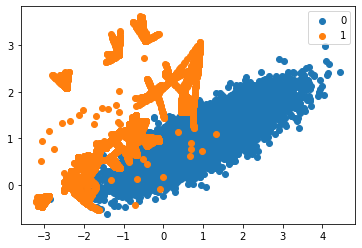

In [2]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


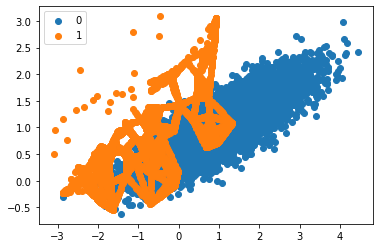

In [3]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


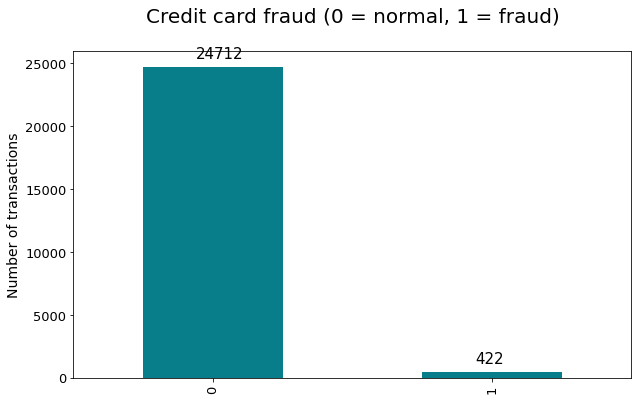

In [3]:
ax = df['TARGET'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Credit card fraud (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [4]:
#Remap to integers
df['GENDER'] = [0 if x == 'M' else 1 for x in df['GENDER']]
df['CAR'] = [1 if x == 'Y' else  0 for x in df['CAR']]
df['REALITY'] = [1 if x == 'Y' else 0 for x in df['REALITY']]

#Create dummy variables
dummy_income_type = pd.get_dummies(df['INCOME_TYPE'], prefix='INC_TYPE', drop_first=True)
dummy_edu_type = pd.get_dummies(df['EDUCATION_TYPE'], prefix='EDU_TYPE', drop_first=True)
dummy_family_type = pd.get_dummies(df['FAMILY_TYPE'], prefix='FAM_TYPE', drop_first=True)
dummy_house_type = pd.get_dummies(df['HOUSE_TYPE'], prefix='HOUSE_TYPE', drop_first=True)

#Drop unnecessary columns
to_drop = ['Unnamed: 0', 'ID', 'FLAG_MOBIL', 'INCOME_TYPE',
            'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
df.drop(to_drop, axis=1, inplace=True)

#Merge into a single data frame
merged = pd.concat([df, dummy_income_type, dummy_edu_type, dummy_family_type, dummy_house_type], axis=1)
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0,112500.0,0,0,0,2.0,29,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,270000.0,0,1,1,1.0,4,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0,270000.0,0,1,1,1.0,38,...,1,0,0,1,0,1,0,0,0,0


In [5]:
from sklearn.preprocessing import MinMaxScaler

#Scale only columns tha have values gretaer than 1
to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

#replace original columns with scaled ones
for col in scaled:
    merged[col] = scaled[col]
merged.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,0,1,1,0.0,0.055233,0,0,0,0.052632,0.483333,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0.0,0.156977,0,1,1,0.000000,0.066667,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,...,1,0,0,1,0,1,0,0,0,0
3,1,0,1,0.0,0.156977,0,1,1,0.000000,0.433333,...,1,0,0,1,0,1,0,0,0,0
4,1,0,1,0.0,0.156977,0,1,1,0.000000,0.633333,...,1,0,0,1,0,1,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

x = merged.drop('TARGET', axis=1)
y = merged['TARGET']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
print(f'''% Positive class inTrain = {np.round(y_train.value_counts(normalize=True)[1] * 100,2)}
% Psitive class in Test = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class inTrain = 1.69
% Psitive class in Test = 1.65


(18850,)
Aacuuracy = 0.98
Recall = 0.09



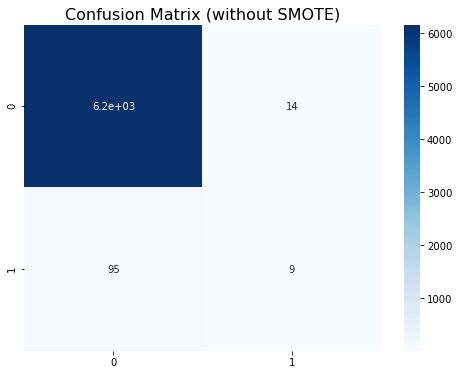

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

#Train
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(y_train.shape)
#Evaluate
print(f'Aacuuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of x before SMOTE: {x.shape} 
Shape of x after SMOTE: {x_sm.shape}''')


Shape of x before SMOTE: (25134, 29) 
Shape of x after SMOTE: (49424, 29)


In [16]:
import numpy as np
import pandas as pd


x_d_sm = pd.DataFrame.from_records(x_sm)
y_d_sm = pd.DataFrame(y_sm, columns = ['class'])
y_d_sm.shape

(0, 1)

In [13]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(
    x_d_sm, y_d_sm, test_size=0.25, random_state=42)
print(f'''% Positive class in Train = {np.round(y_train_sm.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test = {np.round(y_test_sm.value_counts(normalize=True)[1] * 100, 2)}''')

ValueError: Found input variables with inconsistent numbers of samples: [49424, 0]